## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important to get some practice working with the difficulties of these 

For this project, I work to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

#### Part I - Probability


In [1]:
#Import libraries to use
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
#Read the csv file as a dataframe
df = pd.read_csv('ab_data.csv')

#Display its first five rows
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
#Explore no of df rows
len(df.index)

294478

In [4]:
#Show number of unique users
unique_usrs = df.user_id.nunique()
unique_usrs

290584

In [5]:
#Get total no of users 
total_usrs = int(df.shape[0])

#Get no of users whom converted
conv_usrs = int(df.query('converted == 1').user_id.nunique())

#Get the percentage of converted users
p = (conv_usrs/total_usrs)*100

#Display the perecntage & round to nearest 2nd number
p1 = round(p, 2)

#Print the result as a readable text
print('The perecntage of users who decided to convert after the free trial is {} %.'.format(p1))

The perecntage of users who decided to convert after the free trial is 11.94 %.


In [6]:
#Query from df the case when group is treatment but landing page is not a new page & then count
treat_not_new_gp = df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').user_id.count()

#Print the result as a readable text
print('The number of times in case of traetment group but landing page is not a new page is {}.'.format(treat_not_new_gp))

The number of times in case of traetment group but landing page is not a new page is 3893.


In [7]:
#Confirm that there're no missing values
df.isnull().values.any()

False

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
inaccurate_rows = df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page") or (group == "control" and landing_page != "old_page") or (group !="control" and landing_page =="old_page")')
df2 = df.drop((inaccurate_rows).index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
#Find no of unique users ids in the new df2
df2_unique = df2.user_id.nunique()

#Print the result in a readable text
print('The number of unique users ids after removing inaccurate data is {} unique user ids.'.format(df2_unique))

The number of unique users ids after removing inaccurate data is 290584 unique user ids.


In [11]:
#Find the duplicated user id
rep_id = df2[df2.duplicated(['user_id'], keep=False)]['user_id']
rep_id

1899    773192
2893    773192
Name: user_id, dtype: int64

In [12]:
#Display the duplicated user id which is 773192 rows
rep_id_rows = df2[df2.user_id == 773192]
rep_id_rows

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
#Remove earlier timestamp
df2 = df2.drop(df2[(df2['user_id'] == 773192) & (df2['timestamp'] == '2017-01-14 02:55:59.590927')].index)
# Check again if the row with a duplicate user_id is deleted or not
id_row = df2[df2.user_id == 773192]
id_row

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


In [14]:
#Find the percentage of converted users after the free trial in new df2
#Get total no of df2 total users 
total_usrs_n = int(df2.shape[0])

#Get no of users whom converted
conv_usrs_n = int(df2.query('converted == 1').user_id.nunique())

#Get the probability of converted users
p_n = (conv_usrs_n/total_usrs_n)
#Round the probability to the nearest 5th integer
p2 = round(p_n, 5)
#Print the result as a readable text
print('The probability of users who decided to convert after the free trial, after removing inaccurate users ids is {} .'.format(p2))

The probability of users who decided to convert after the free trial, after removing inaccurate users ids is 0.1196 .


In [15]:
#Find the probability of converted users after the free trial in new df2, while being in the control group
#Get total no of df2 total users in the control group
total_usrs_c = int(df2.query('group == "control"').user_id.nunique())

#Get no of users whom converted & in the control group
conv_usrs_c = int(df2.query('converted == 1 & group == "control"').user_id.nunique())

#Get the probability of converted users
p_c = (conv_usrs_c/total_usrs_c)
#Round the probability to the nearest 5th integer
p3 = round(p_c, 5)
#Print the result as a readable text
print('The probability of users who decided to convert after the free trial & while being in the control group, after removing inaccurate users ids is {} .'.format(p3))

The probability of users who decided to convert after the free trial & while being in the control group, after removing inaccurate users ids is 0.12039 .


In [16]:
#Find the probability of converted users after the free trial in new df2, while being in the treatment group
#Get total no of df2 total users in the treatment group
total_usrs_t = int(df2.query('group == "treatment"').user_id.nunique())

#Get no of users whom converted & in the treatment group
conv_usrs_t = int(df2.query('converted == 1 & group == "treatment"').user_id.nunique())

#Get the probability of converted users
p_t = (conv_usrs_t/total_usrs_t)
#Round the probability to the nearest 5th integer
p4 = round(p_t, 5)
#Print the result as a readable text
print('The probability of users who decided to convert after the free trial & while being in the treatment group, after removing inaccurate users ids is {} .'.format(p4))

The probability of users who decided to convert after the free trial & while being in the treatment group, after removing inaccurate users ids is 0.11881 .


In [17]:
#Get the probability of converted users, whom received the new page
p_p = df2.query("landing_page == 'new_page'").shape[0]/df2.shape[0]

#Round the probability to the nearest 5th integer
p5 = round(p_p, 5)

#Print the result as a readable text
print('The probability of users who decided to convert after the free trial, after removing inaccurate users ids , while receiving the new page is {} .'.format(p5))

The probability of users who decided to convert after the free trial, after removing inaccurate users ids , while receiving the new page is 0.50006 .


>**Summary for the above results**
- The probability of users who decided to convert after the free trial, after removing inaccurate users ids is 0.1196 .
- The probability of users who decided to convert after the free trial & while being in the control group, after removing inaccurate users ids is 0.12039 .
- The probability of users who decided to convert after the free trial & while being in the treatment group, after removing inaccurate users ids is 0.11881 .
- The probability of users who decided to convert after the free trial, after removing inaccurate users ids , while receiving the new page is 0.11881 .

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, i could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do i stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do i run to render a decision that neither page is better than another?  
 

>**Hypothesis:**
- 𝐻0;  𝑝𝑜𝑙𝑑 >=  𝑝𝑛𝑒𝑤
- 𝐻1;  𝑝𝑜𝑙𝑑 <  𝑝𝑛𝑒𝑤

- Equivalent:

- 𝐻0;  𝑝new <=  𝑝old
- 𝐻1;  𝑝new >  𝑝old

In [18]:
#Calculate the Pnew conversion success rate, under the null hypothesis; regardless of the type of page
prop_new = int(df2.query('converted == 1').user_id.nunique())/int(df2.user_id.nunique())
prop_new

0.11959708724499628

In [19]:
#Calculate the Pold conversion success rate, under the null hypothesis; regardless of the type of page
prop_old = int(df2.query('converted == 1').user_id.nunique())/int(df2.user_id.nunique())
prop_old

0.11959708724499628

In [20]:
#Calculate the no of individuals in the treatment group
n_new = df2.query('landing_page == "new_page"').user_id.nunique()

#Print a readable text
print('The number of individuals in the treatment group, that are shown the new page is {}.'.format(n_new))

The number of individuals in the treatment group, that are shown the new page is 145310.


In [21]:
#Calculate the no of individuals in the control group
n_old = df2.query('landing_page == "old_page"').user_id.nunique()

#Print a readable text
print('The number of individuals in the control group, that are shown the old page is {}.'.format(n_old))

The number of individuals in the control group, that are shown the old page is 145274.


In [22]:
# Calculate the actual mean difference (obs_diff) between the conversion rates for the two groups.
obs_diff = (p3-p4)

#Print the result in a readable text
print('The actual average difference between the conversion rates for the previous two groups is {}.'.format(obs_diff))

The actual average difference between the conversion rates for the previous two groups is 0.001579999999999998.


In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size = n_new, p = (prop_new, 1-prop_new))

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size = n_old, p = (prop_old, 1-prop_old))

In [25]:
#Calculate the difference in the converted propability
p_diffs = new_page_converted.mean() - old_page_converted.mean()
p_diffs

-0.0006381036472118407

In [26]:
# Sampling distribution 
p_diffs = []

#For loop in range ten thousnads
for i in range(10000):
    new_page_converted = np.random.choice([1,0],n_new, replace=True,p=(prop_new, 1-prop_new)).mean()
    old_page_converted = np.random.choice([1,0],n_old, replace=True,p=(prop_old, 1-prop_old)).mean()
    diffs = new_page_converted - old_page_converted
    p_diffs.append(diffs)

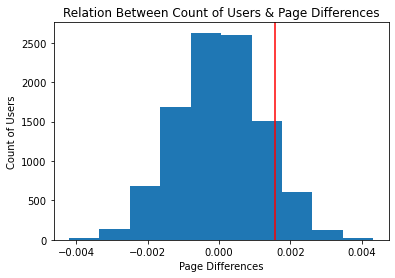

In [27]:
#array p_diffs, so we can easily deal with it
p_diffs = np.array(p_diffs)

#plot a histogram; showing count of users & pages diferences while identifying the obs_diff; actual diff between the conversion rates of the control & treatment groups
plt.hist(p_diffs)
plt.title('Relation Between Count of Users & Page Differences')
plt.xlabel('Page Differences')
plt.ylabel('Count of Users')

#identify the obs_diff on the axvline
plt.axvline(x=obs_diff, color='red')
plt.show()

In [28]:
#Query var1 as users landing page is equal to new page
var1 = df2.query('landing_page=="new_page"')
var1=var1['converted'].mean()

#Query var2 as users landing page is equal to old page
var2 = df2.query('landing_page=="old_page"')
var2 = var2['converted'].mean()

#Calculate the actual difference
actual_difference = var1-var2

#For loop shows proportion of the page difference when greater than the actual difference
count = 0
for i in p_diffs:
    if i> actual_difference:
        count = count+1
        
actual_diff = count/(len(p_diffs))

#Print a readable text
print("The proportion of the pages difference ,when greater than the actual difference is {}".format(actual_diff))

The proportion of the pages difference ,when greater than the actual difference is 0.9058


>**The value calculated above is called p-value. To accept null hypothesis p-value should be greater than suggested p-value. I calculate that almost 90% of the population is above the real diffrence which suggested that new-page is not doing well better than the old page. New page is worse than old page, so I should stick to the null hyposthesis as p-value is large.**

In [29]:
import statsmodels.api as sm
# number of conversions with the old_page
convert_old = df2.query('(converted == 1) & (group == "control")').count()[0]
            
# number of conversions with the new_page
convert_new = df2.query('(converted == 1) & (group == "treatment")').count()[0]
            
# number of individuals who were shown the old_page
n_old = df2.query('group == "control"').count()[0]
            
# number of individuals who received new_page
n_new = df2.query('group == "treatment"').count()[0]
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

In [30]:
count = [convert_old, convert_new]
nobs = [n_old, n_new]
z_score, p_value = sm.stats.proportions_ztest(count, nobs)

#Print a readable text
print('z score: ', z_score, ' & p value: ', p_value)

z score:  1.3109241984234394  & p value:  0.18988337448195103


In [31]:
 #How significant our z-score
from scipy.stats import norm
norm.cdf(z_score)

0.9050583127590245

In [32]:
#Our critical value at 95% confidence interval
norm.ppf(1-(0.05/2)) 

1.959963984540054

The z-score of 1.31109 is less than critical value at 95% confidence interval, 1.9510, so it falls within the confidence interval range of 95%. We fail to reject the null hypothesis; the old page converted more page users than the new page.
Also, our p-value(0.1898) is different than what we computed in parts j and k which is expected because the null and alternative hypothesis assumed that the prop_new & prop_old are the same & that there is no difference in converted users from the old page & new page. However, that is not the case since the old page does convert more users than the old page based on the lower p-value.


<a id='regression'></a>
### Part III - A regression approach

**I should perform logistic regression in this case.**

In [33]:
#Add an intercept column
df2['intercept'] = 1

#Create dummy variable column for ab page
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

#Display first three rows
df2.head(3)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1


In [34]:
#Import statsmodels library
import statsmodels.api as sm

#Instantiate the model
model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

#Fit the model
result = model.fit() 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [35]:
#Provide a summary for the model
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 11 May 2022   Pseudo R-squ.:               8.077e-06
Time:                        23:30:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""


- The p-value found in the logistic regression model is approximately equals 0.19, that is different from what we found in parts j and k, cause my null and alternative hypthesis model assumed that there is an equal probability of the old and new page converting users.
- while in the logistic regression model, this isn't the case. Also, the Logistic Regression performed is a two-tailed test, & the computation done in Part II is a one-tailed test.


- From my point of view, other factors that influence whether an individual converts could be age factor.Hence; Old users may prefer more information on the pages as opposed to a child, as they may prefer more pictures and a more casual themes.
- Adding more factors into the regression model may increase or decrease the confidence intervals.
- A disadvantage of multiple factors in a logistic regression model is that it reduces the analysis.

In [36]:
#Read the countries csv file
countries_df = pd.read_csv('./countries.csv')

#Inner Join countries dataframe & df2, using user id columns
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

#Display the first three rows
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1


In [37]:
### Create the necessary dummy variables
#Add dummy variables with country
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US', "UK"]]

#Display the first three rows
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1


In [38]:
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']

#Display the first three rows
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0


In [39]:
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']

#Display the first three rows
df_new.head(3)

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1


In [40]:
### Fit Your Linear Model And Obtain the Results
logit2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])
result2 = logit2.fit()
result2

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [41]:
#Display the summary
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 11 May 2022   Pseudo R-squ.:               3.482e-05
Time:                        23:30:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

None of the above variables have significant p-values. So that,I fail to reject the null and conclude that there isn't sufficient evidence to suggest that there is an interaction between country and page received that predict whether a user converts or not.

In general, based on the available information, i don't have sufficient evidence to suggest that the new page results in more conversions than the old page. 
